# **1. Importing Library and Dataset**
Uber and Lyft Dataset Boston, MA

Sumber: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/code

In [ ]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import kaleido

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"genfortify","key":"485af2bc676a678f8d6a15c471cf65c6"}'}

In [ ]:
! mkdir kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

 56% 25.0M/44.5M [00:00<00:00, 109MB/s] 
100% 44.5M/44.5M [00:00<00:00, 140MB/s]


In [ ]:
! mkdir dataset

In [ ]:
! unzip uber-and-lyft-dataset-boston-ma.zip -d dataset

Archive:  uber-and-lyft-dataset-boston-ma.zip
  inflating: dataset/rideshare_kaggle.csv  


In [ ]:
df=pd.read_csv("/content/dataset/rideshare_kaggle.csv")
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Minimum surge multiplier: 1.0
Maximum surge multiplier: 3.0
Range of surge multipliers: 2.0


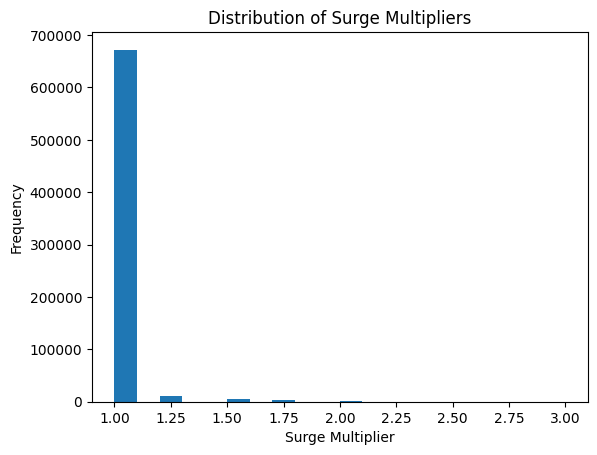

In [ ]:
surge_multipliers = df['surge_multiplier']

# Calculate range
range_min = surge_multipliers.min()
range_max = surge_multipliers.max()
range_val = range_max - range_min

# Print range information
print("Minimum surge multiplier:", range_min)
print("Maximum surge multiplier:", range_max)
print("Range of surge multipliers:", range_val)

# Plot the distribution
plt.hist(surge_multipliers, bins=20)
plt.xlabel("Surge Multiplier")
plt.ylabel("Frequency")
plt.title("Distribution of Surge Multipliers")
plt.show()

In [ ]:
# Group the data by hour and calculate the average surge multiplier
hourly_avg = df.groupby('hour')['surge_multiplier'].mean()

# Find the hour with the highest surge multiplier
highest_hour = hourly_avg.idxmax()
highest_multiplier = hourly_avg.max()

# Find the hour with the lowest surge multiplier
lowest_hour = hourly_avg.idxmin()
lowest_multiplier = hourly_avg.min()

print(f"Highest Surge Multiplier: Hour {highest_hour}, Multiplier {highest_multiplier}")
print(f"Lowest Surge Multiplier: Hour {lowest_hour}, Multiplier {lowest_multiplier}")

Highest Surge Multiplier: Hour 13, Multiplier 1.017015534491838
Lowest Surge Multiplier: Hour 16, Multiplier 1.0126300026329647


In [ ]:
# Calculate the average surge multiplier for each hour
hourly_avg = df.groupby('hour')['surge_multiplier'].mean()

# Create a new DataFrame with all hours from 0 to 24
all_hours = pd.DataFrame({'hour': range(0, 25)})

# Merge the average surge multiplier data with the complete hours DataFrame
hourly_avg = all_hours.merge(hourly_avg, on='hour', how='left')

# Fill missing values with 0 (if no data available for that hour)
hourly_avg['surge_multiplier'].fillna(0, inplace=True)

print(hourly_avg)

    hour  surge_multiplier
0      0          1.014238
1      1          1.014117
2      2          1.014432
3      3          1.013617
4      4          1.013396
5      5          1.013676
6      6          1.013352
7      7          1.012823
8      8          1.013718
9      9          1.014359
10    10          1.012737
11    11          1.014465
12    12          1.013733
13    13          1.017016
14    14          1.013691
15    15          1.013626
16    16          1.012630
17    17          1.013691
18    18          1.013815
19    19          1.012901
20    20          1.014646
21    21          1.014289
22    22          1.014557
23    23          1.013138
24    24          0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
#mengubah kolom 'datetime' dalam DataFrame menjadi objek tipe data datetime
#berguna jika kolom 'datetime' dalam DataFrame Anda awalnya dalam format yang tidak terinterpretasi secara otomatis sebagai tipe data datetime oleh pandas.
df['datetime']=pd.to_datetime(df['datetime'])

 Data Cleaning

In [ ]:
df.isnull().sum().sum()

55095

In [ ]:
df.dropna(axis=0,inplace=True)
df.isnull().sum().sum()

0

In [ ]:
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [ ]:
df = df.drop(['visibility.1'],axis=1)
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

# **2. EDA and visualization**

## **1. Menganalisis data Time**

### --Month Data--

In [ ]:
df_counts = df['month'].value_counts().reset_index()
df_counts.columns = ['month', 'counts']

# Mengurutkan data berdasarkan bulan
df_counts = df_counts.sort_values('month')

# Membuat plot bar chart
fig = px.bar(data_frame=df_counts, x='month', y='counts', labels={'counts': 'Jumlah'})
fig.update_layout(title='Jumlah Data per Bulan',
                  xaxis_title='Bulan',
                  yaxis_title='Jumlah Data')

# Menampilkan plot
fig.show(renderer='plotly_mimetype')

Dapat dilihat kita memiliki data bulan november dan desember. Artinya data hanya direkam atau diambil pada bulan november dan desember dengan dominasi data desember.

### --Day Data--

In [ ]:
df_counts = df['day'].value_counts().reset_index()
df_counts.columns = ['day', 'counts']

# Mengurutkan data berdasarkan hari
df_counts = df_counts.sort_values('day')

# Membuat plot bar chart
fig = px.bar(data_frame=df_counts, x='day', y='counts', labels={'counts': 'Jumlah'})
fig.update_layout(title='Jumlah Data per Hari',
                  xaxis_title='Hari',
                  yaxis_title='Jumlah Data')

# Menampilkan plot
fig.show(renderer='plotly_mimetype')

Dapat dilihat kita memiliki banyak celah dalam data 'hari' kami. Seperti contoh kita tidak memiliki data dari hari ke-18 hingga hari ke-25 di setiap bulan

In [ ]:
df_counts = df['hour'].value_counts().reset_index()
df_counts.columns = ['hour', 'counts']

# Mengurutkan data berdasarkan jam
df_counts = df_counts.sort_values('hour')

# Membuat plot bar chart
fig = px.bar(data_frame=df_counts, x='hour', y='counts', labels={'counts': 'Jumlah'})
fig.update_layout(title='Jumlah Data per Jam',
                  xaxis_title='Jam',
                  yaxis_title='Jumlah Data')

# Menampilkan plot
fig.show(renderer='plotly_mimetype')

Data yang kita punya hampir semua mencakup 24 jam, yang berarti tidak ada gap dalam data waktu

## **2. Menganalisis data Source dan Destination**

In [ ]:
df_counts = df['source'].value_counts().reset_index()
df_counts.columns = ['source', 'counts']

# Membuat plot bar chart
fig = px.bar(data_frame=df_counts, x='source', y='counts', labels={'counts': 'Jumlah'})
fig.update_layout(title='Jumlah Data per Source',
                  xaxis_title='Source',
                  yaxis_title='Jumlah Data')

# Menampilkan plot
fig.show(renderer='plotly_mimetype')

In [ ]:
df_counts = df['destination'].value_counts().reset_index()
df_counts.columns = ['destination', 'counts']

# Membuat plot bar chart
fig = px.bar(data_frame=df_counts, x='destination', y='counts', labels={'counts': 'Jumlah'})
fig.update_layout(title='Jumlah Data per Destination',
                  xaxis_title='Destination',
                  yaxis_title='Jumlah Data')

# Menampilkan plot
fig.show(renderer='plotly_mimetype')

In [ ]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336960 -71.066178
                        Fenway                   42.337740 -71.065822
                        Haymarket Square         42.337087 -71.065110
                        North End                42.338100 -71.066343
                        Northeastern University  42.336668 -71.065314
                        South Station            42.338897 -71.065908
Beacon Hill             Boston University        42.336917 -71.065885
                        Fenway                   42.338990 -71.065719
                        Haymarket Square         42.337413 -71.066059
                        North End                42.338418 -71.065809
                        Northeastern University  42.337268 -71.066061
                        South Station            42.336316 -71.065699
Boston University       Back Bay                 42.337217 -71.065947
                        Beacon Hill              42.339364 -71.066517
                        Financial District       42.339361 -71.066465
                        North Station            42.338372 -71.066191
                        Theatre District         42.338152 -71.066276
                        West End                 42.337556 -71.066265
Fenway                  Back Bay                 42.340103 -71.065819
                        Beacon Hill              42.337595 -71.065471
                        Financial District       42.337147 -71.066254
                        North Station            42.339660 -71.066504
                        Theatre District         42.336378 -71.065388
                        West End                 42.338521 -71.066339
Financial District      Boston University        42.338733 -71.066581
                        Fenway                   42.337034 -71.066028
                        Haymarket Square         42.337781 -71.065863
                        North End                42.338338 -71.065965
                        Northeastern University  42.338523 -71.065964
                        South Station            42.338989 -71.067037
Haymarket Square        Back Bay                 42.339877 -71.066475
                        Beacon Hill              42.337246 -71.065966
                        Financial District       42.337398 -71.066237
                        North Station            42.338276 -71.066073
                        Theatre District         42.338175 -71.065699
                        West End                 42.339109 -71.066251
North End               Back Bay                 42.338516 -71.066170
                        Beacon Hill              42.336792 -71.066216
                        Financial District       42.337654 -71.066158
                        North Station            42.339309 -71.066936
                        Theatre District         42.338578 -71.066639
                        West End                 42.338614 -71.065878
North Station           Boston University        42.338786 -71.066362
                        Fenway                   42.338450 -71.066614
                        Haymarket Square         42.337260 -71.066279
                        North End                42.337672 -71.065832
                        Northeastern University  42.337793 -71.066491
                        South Station            42.336529 -71.065432
Northeastern University Back Bay                 42.338917 -71.066289
                        Beacon Hill              42.339002 -71.065600
                        Financial District       42.337789 -71.066015
                        North Station            42.339770 -71.066493
                        Theatre District         42.338356 -71.065319
                        West End                 42.336812 -71.066274
South Station           Back Bay                 42.338567 -71.065891
                        Beacon Hill              42.338714 -

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 97.4 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

Berikut merupakan visualisasi spasial dengan membuat peta geospasial untuk memvisualisasikan data kami yang titik keberangkatan perjalanannya adalah Haymarket square

## **3. Menganalisis data Cab Type**

In [ ]:
df_counts = df['cab_type'].value_counts().reset_index()
df_counts.columns = ['cab_type', 'counts']

# Membuat plot bar chart
fig = px.bar(data_frame=df_counts, x='cab_type', y='counts', labels={'counts': 'Jumlah'})
fig.update_layout(title='Jumlah Data per Cab Type',
                  xaxis_title='Cab Type',
                  yaxis_title='Jumlah Data')

# Menampilkan plot
fig.show(renderer='plotly_mimetype')

Jadi untuk seluruh data kita memiliki lebih banyak data uber daripada data lyft. Selisihnya tidak terlalu besar, setiap tipe taksi memiliki sekitar 300 ribu data. Uber tampaknya mendominasi pesanan pemesanan di data kita.

## **4. Menganalisis data Price**

In [ ]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])


mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [ ]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


Rute 'Distrik Finansial - Fenway' (oleh lyft) berharga 97,5 dolar, yang merupakan data harga maksimum. Namun jarak kedua tempat tersebut tidak terlalu jauh (keduanya berada di boston), sehingga bisa jadi outlier karena kita tidak memiliki informasi tentang durasi perjalanan atau transit. Kita harus memeriksa data lain dengan rute yang sama

In [ ]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')]

,source,destination,mean
25,Financial District,Fenway,23.40485


Rata-rata data harga rute tersebut adalah 23,4 dolar, jauh dari data harga maksimum (97,5 dolar). Maka ada kemungkinan outlier. Kita bisa drop data tersebut

In [ ]:
df = df.loc[df['price']!=df.price.max()]

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# **3. Data Preprocessing**

## 1. Menghapus Fitur yang Tidak Perlu

In [ ]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [ ]:
new_df.shape

(637975, 41)

Tujuan kami adalah membuat model regresi linier. Pertama kami memeriksa korelasi antara fitur kami dan fitur target (harga)

Pertama, saya ingin memeriksa korelasi fitur terkait suhu kami dengan fitur target kami (Harga)

In [ ]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [ ]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<Axes: >

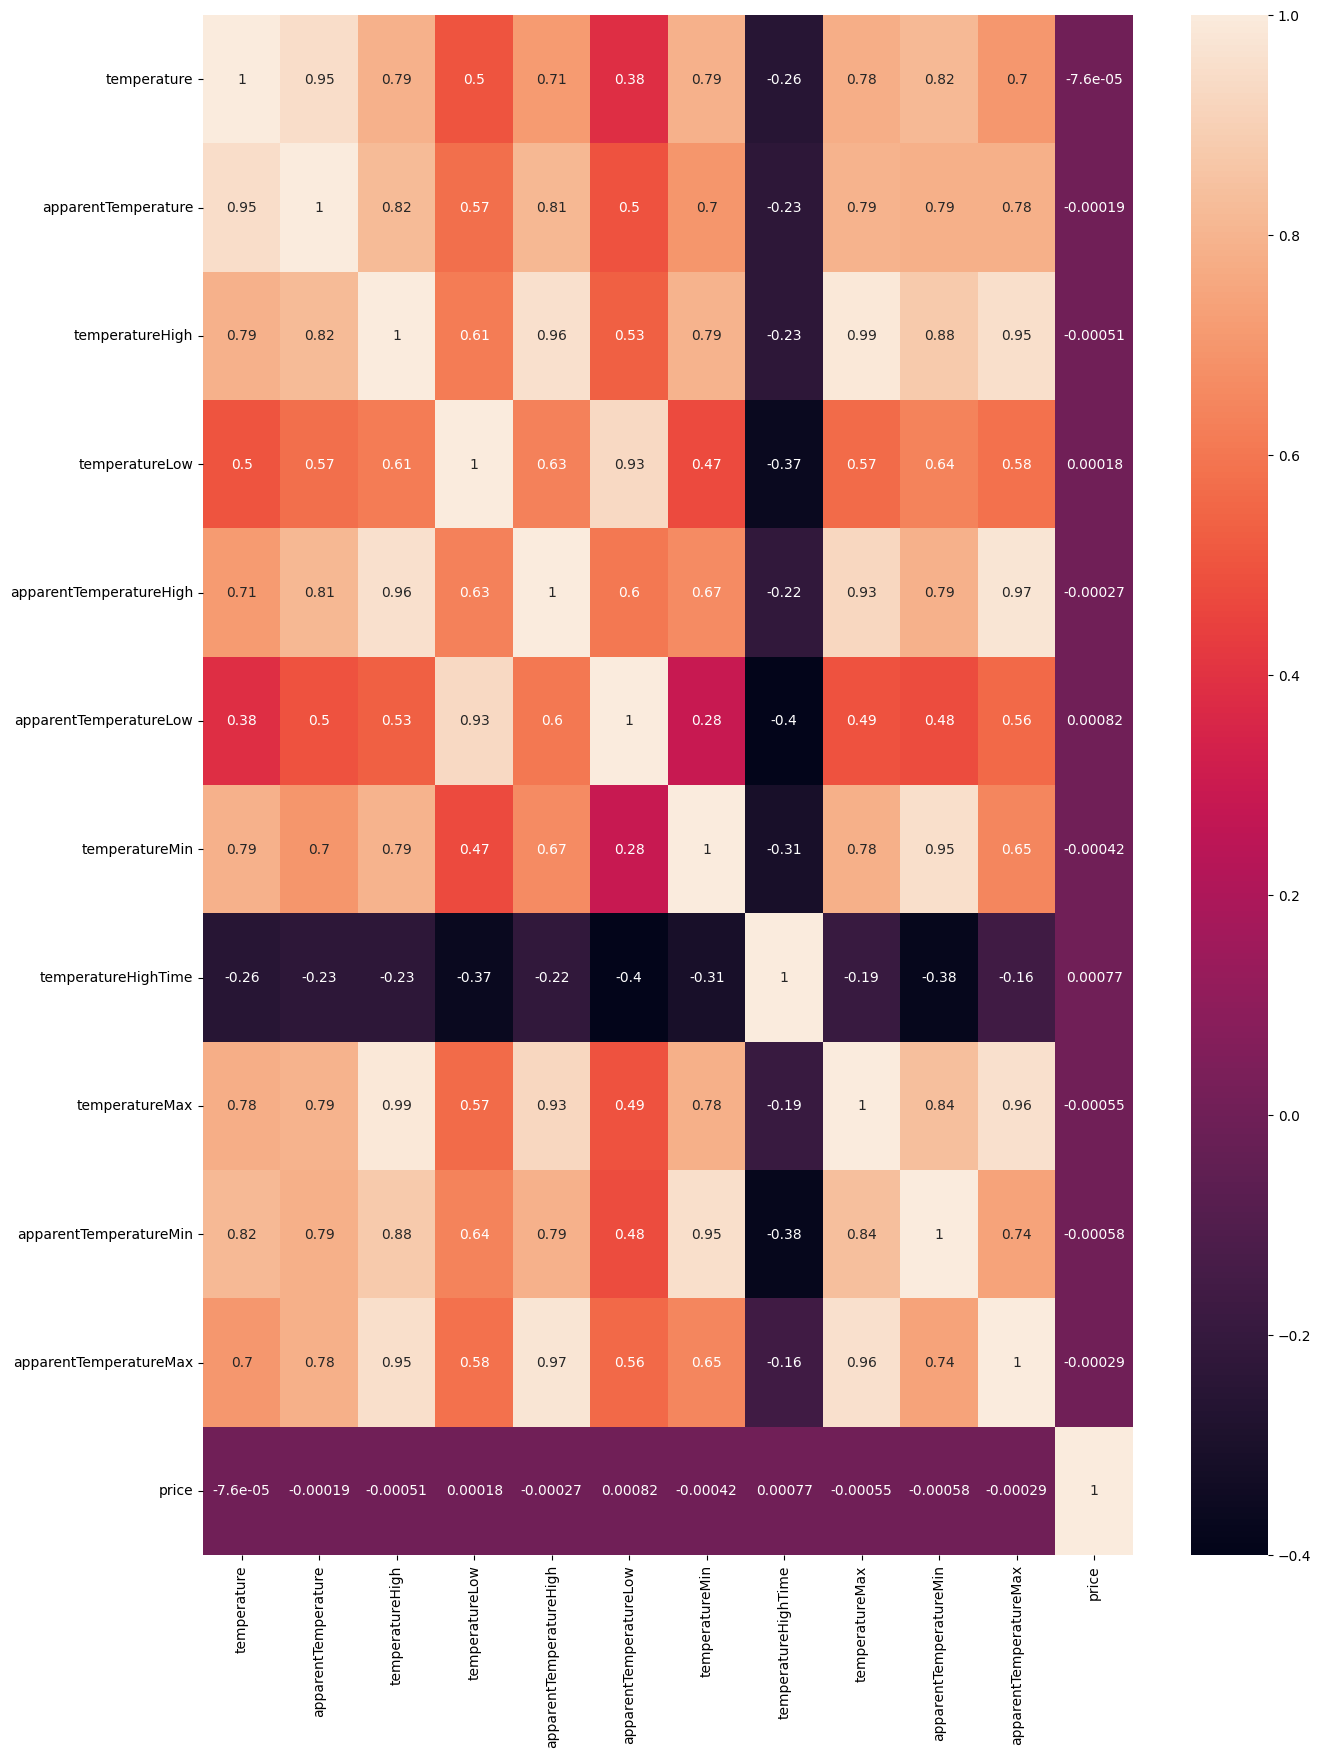

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

Kami melihat bahwa semua fitur terkait suhu memiliki korelasi yang lemah dengan fitur target kami yaitu harga

Menghapus semuanya tidak akan berdampak apa pun pada model regresi kita

In [ ]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637975, 30)

Kedua, saya ingin memeriksa korelasi fitur terkait iklim kami dengan fitur target kami (Harga)

In [ ]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

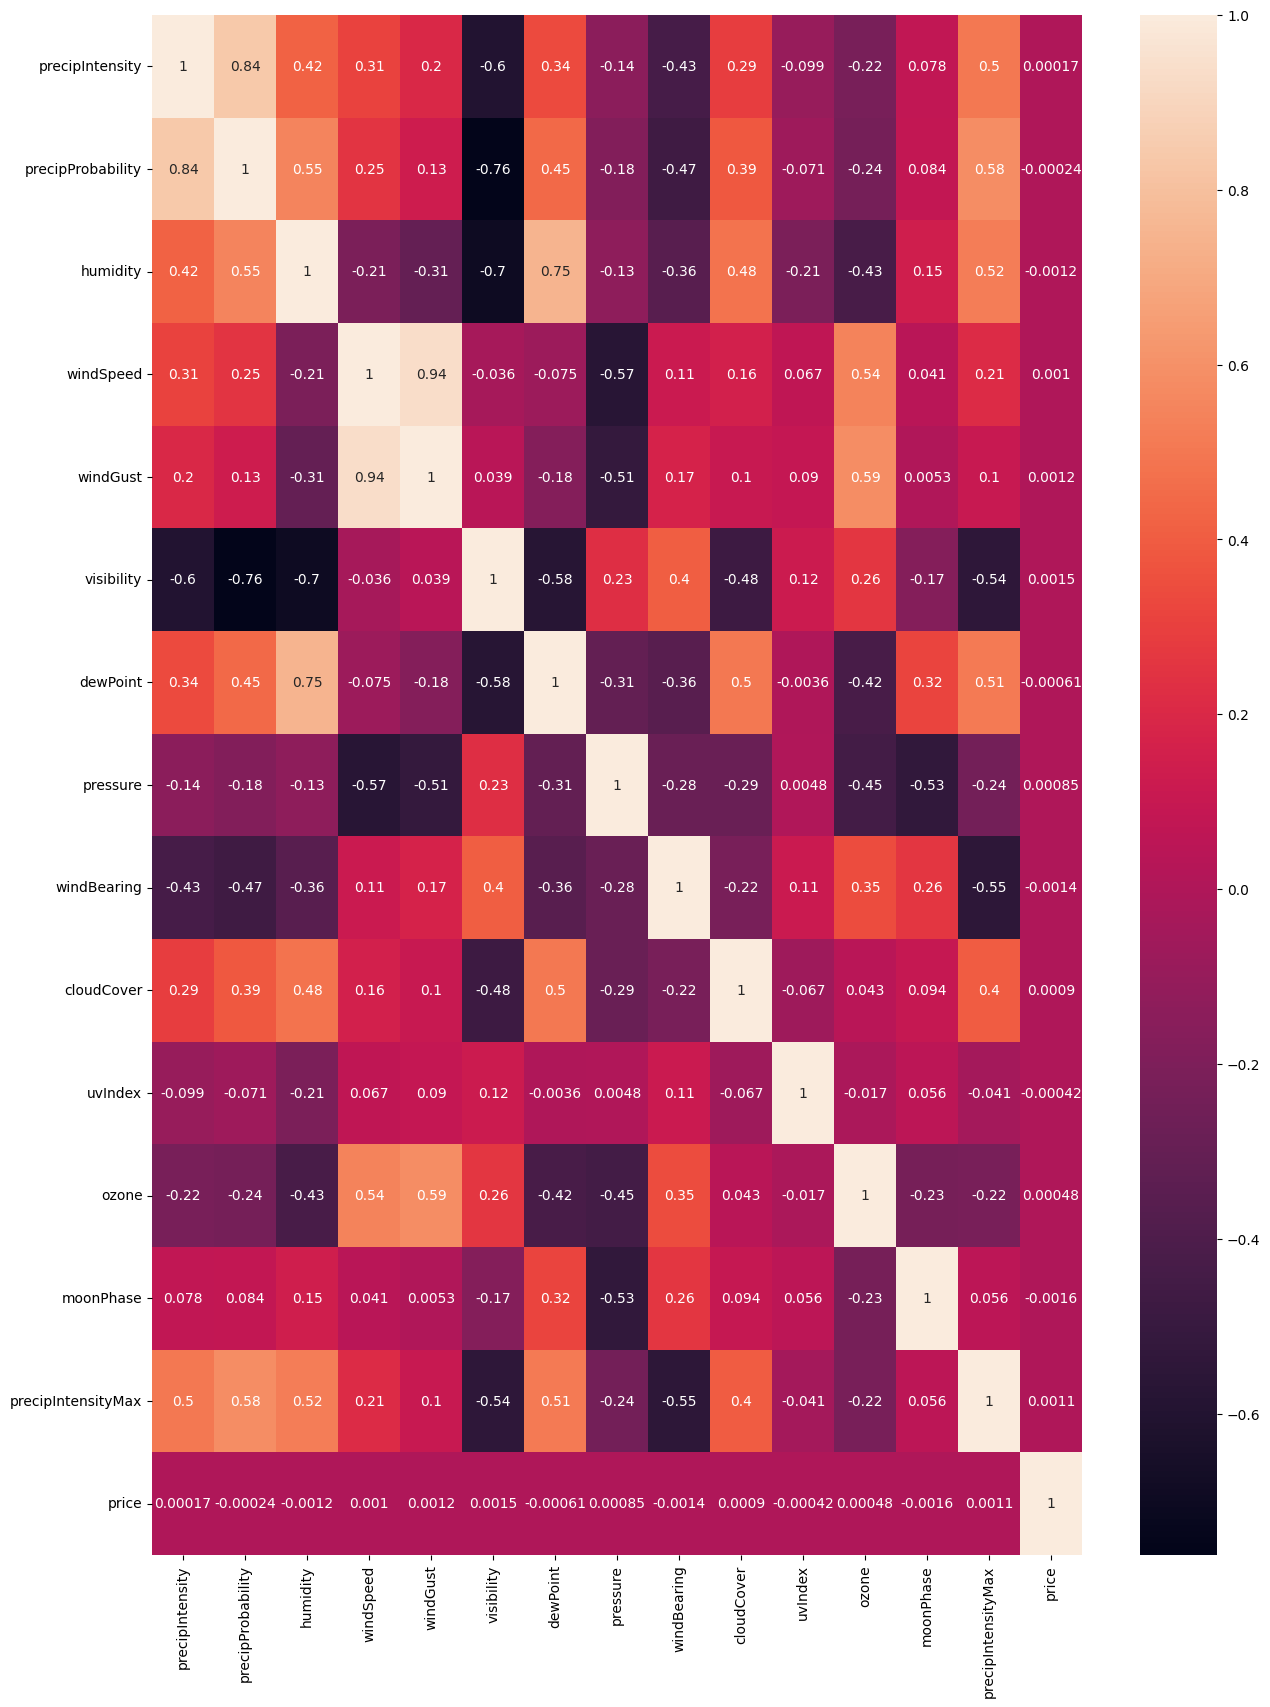

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Rupanya semua fitur terkait iklim juga memiliki korelasi yang lemah dengan fitur target kami yaitu harga

menghapus semuanya tidak akan berdampak apa pun pada model regresi kita

In [ ]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637975, 16)

Ketiga, saya ingin memeriksa nilai kategorikal kami di fitur dataset kami

In [ ]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

In [ ]:
# Group by 'name' and check unique 'cab_type' values in each group
grouped = df.groupby('cab_type')['name'].unique()

# Print the groupby results
for cab_types, name  in grouped.items():
    print(f"{cab_types}: {name}")

Lyft: ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black']
Uber: ['UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']


In [ ]:
# Group by 'surge_multiplier' and count unique values
grouped = df.groupby('surge_multiplier').size()

# Print the number of unique values for each surge_multiplier
for surge_multiplier, count in grouped.items():
    print(f"surge_multiplier: {surge_multiplier}, unique count: {count}") 

surge_multiplier: 1.0, unique count: 617001
surge_multiplier: 1.25, unique count: 11085
surge_multiplier: 1.5, unique count: 5065
surge_multiplier: 1.75, unique count: 2420
surge_multiplier: 2.0, unique count: 2238
surge_multiplier: 2.5, unique count: 154
surge_multiplier: 3.0, unique count: 12


Kita dapat melihat bahwa fitur 'timezone' hanya memiliki 1 nilai dan fitur 'product_id' berisi banyak nilai yang tidak teridentifikasi. Jadi kami dapat menghapusnya.

In [ ]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [ ]:
new_df.shape

(637975, 14)

Keempat, saya ingin memeriksa korelasi fitur kategori kami dengan fitur target kami (harga)

In [ ]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<Axes: >

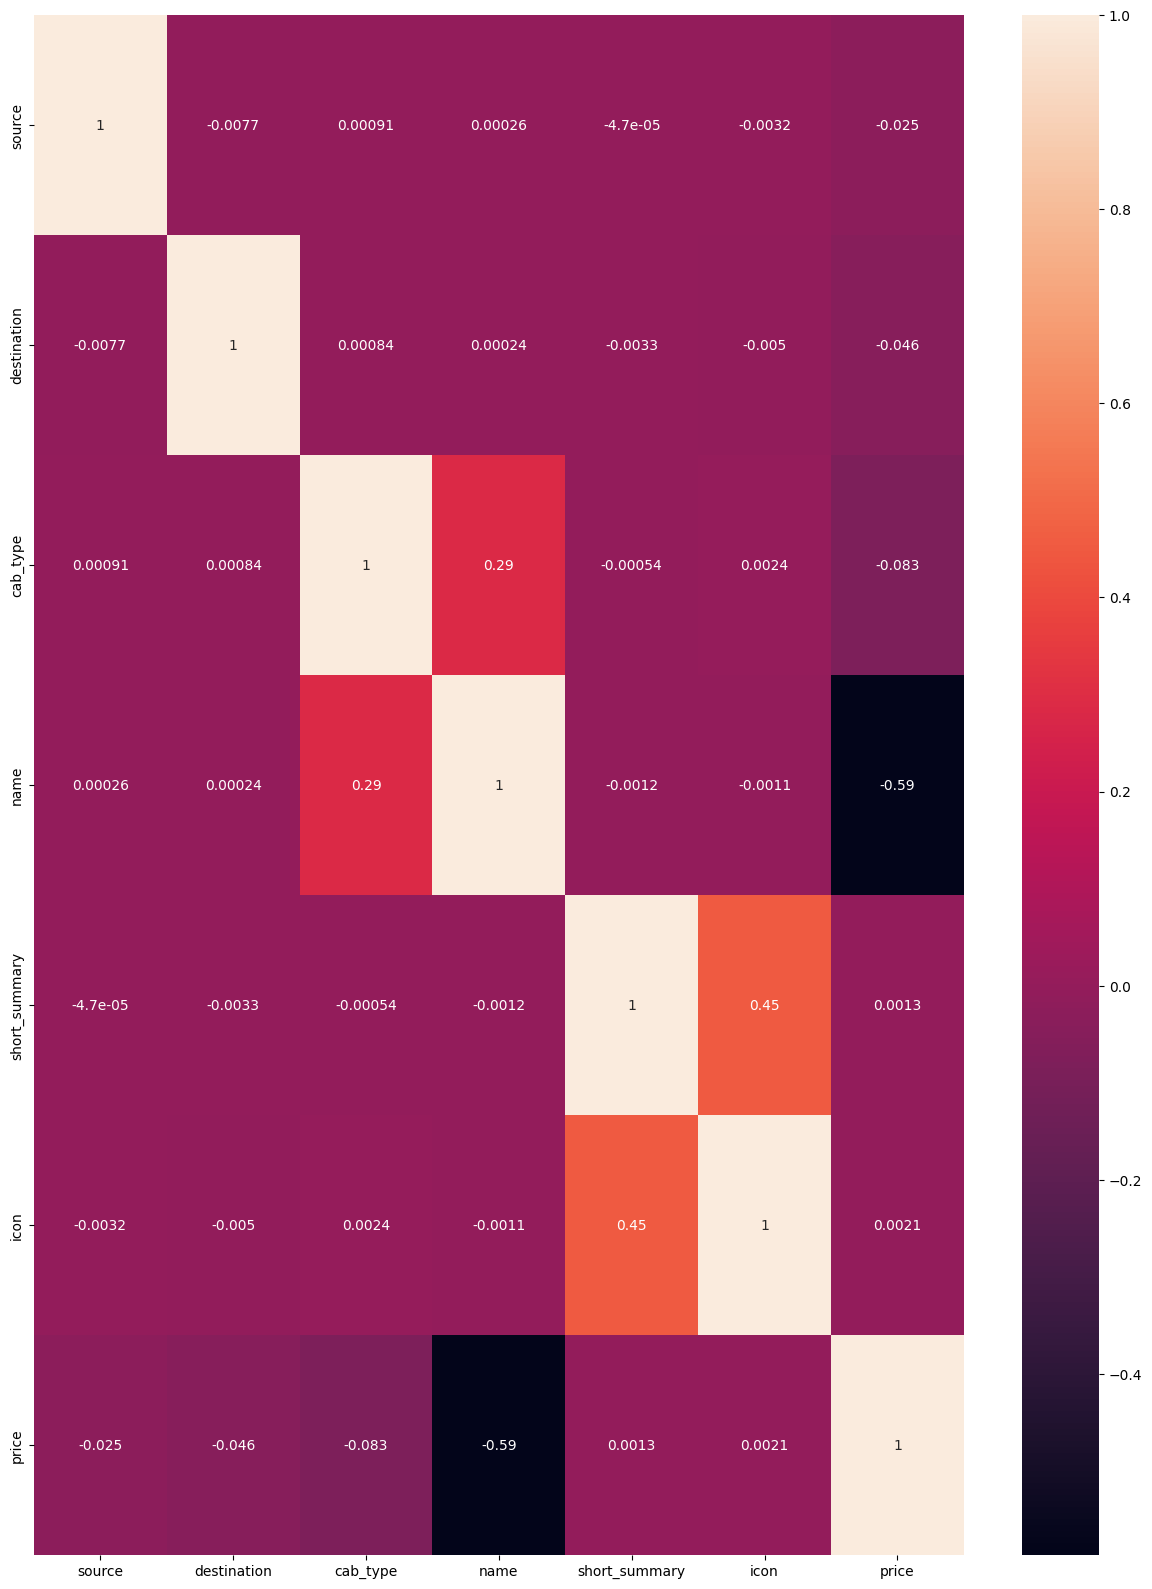

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

Kita hanya dapat melihat fitur nama yang memiliki korelasi yang relatif kuat. Sumber, tujuan, dan fitur cab_type memiliki korelasi yang relatif lemah, tetapi saya akan memilih fitur cab_type karena memiliki korelasi yang lebih kuat daripada dua fitur lainnya. Saya akan menghapus kolom tersebut

In [ ]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


In [ ]:
#kami juga melakukan drop pada data hour, day, month, latitude, longitude karena terlihat tidak mandatory untuk sekarang
new_df = new_df.drop(['hour','day','month','latitude','longitude'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


In [ ]:
new_df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

## 2. Menghapus Outlier

In [ ]:
new_df["price"] = new_df["price"].astype(float)

In [ ]:
Q1 = new_df['price'].quantile(0.25)
Q3 = new_df['price'].quantile(0.75)
IQR = Q3 - Q1

LOWER_LIMIT = Q1 - (1.5 * IQR)
UPPER_LIMIT = Q3 + (1.5 * IQR)

outliers_upper = new_df['price'][(new_df['price'] > UPPER_LIMIT)]
outliers_lower = new_df['price'][(new_df['price'] < LOWER_LIMIT)]
jumlah_outlier =  outliers_lower.size + outliers_upper.size
print("Total outlier: ", jumlah_outlier)

Total outlier:  5588


In [ ]:
new_df[new_df['price']>(Q3+(1.5*IQR))]

,cab_type,name,price,distance,surge_multiplier
706,Lyft,Lux Black,52.5,3.25,2.00
707,Lyft,Lux Black XL,67.5,3.25,2.00
769,Lyft,Lux Black XL,45.5,4.76,1.00
1094,Lyft,Lux Black XL,45.5,4.31,1.00
1318,Lyft,Lux Black XL,45.5,5.33,1.00
...,...,...,...,...,...
692439,Uber,Black SUV,47.0,5.56,1.00
692698,Lyft,Lux Black XL,52.5,4.58,1.25
692891,Lyft,Lux Black XL,47.5,5.42,1.00
692962,Uber,Black SUV,51.0,7.36,1.00


In [ ]:
LOWER_LIMIT

-11.25

In [ ]:
persentase_outlier = (jumlah_outlier / new_df['price'].size) * 100
persentase_outlier

0.8758963909244093

In [ ]:
print('Jumlah baris data sebelum data outlier di-drop: ',new_df.shape[0])
new_df = new_df.loc[new_df['price'] < UPPER_LIMIT]
new_df = new_df.loc[new_df['price'] > LOWER_LIMIT]

print('Jumlah baris data setelah data outlier di-drop: ',new_df.shape[0])

Jumlah baris data sebelum data outlier di-drop:  637975
Jumlah baris data setelah data outlier di-drop:  632387


# **4. Linear Regression Model**

In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



# Memisahkan fitur (X) dan target (y)
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

# Melakukan dataset split menjadi data latihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Membuat objek model regresi linier
reg = LinearRegression()

# Melatih model menggunakan data latihan
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Mengevaluasi model menggunakan data uji
score = model.score(X_test, y_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of determination (R^2):", score)

Mean Squared Error: 5.108383101703272
Root Mean Squared Error: 2.260173245948919
Coefficient of determination (R^2): 0.9337789051792855


In [ ]:
new_df_onehot.drop(columns=['price'],axis=1).head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
import pickle

# Train and fit the model (as shown in your code)

# Save the trained model using pickle
filename = 'linear_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Later, to load the model from the saved file
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Assume the user inputs for the relevant features
user_cab_type = 'Lyft'
user_name = 'Lux Black'
user_distance = 3.25
user_surge_multiplier = 2.0

# Create a DataFrame with the user input
user_input = pd.DataFrame({
    'cab_type': [user_cab_type],
    'name': [user_name],
    'distance': [user_distance],
    'surge_multiplier': [user_surge_multiplier]
})

# One-hot encode the user input to match the encoded data format
user_input_encoded = pd.get_dummies(user_input)

# Reorder the columns to match the encoded data columns
user_input_encoded = user_input_encoded.reindex(columns=new_df_onehot.drop('price', axis=1).columns, fill_value=0)

user_input_encoded

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,3.25,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Normalize the encoded user input if necessary, using the same normalization method

# Load the saved model
loaded_model = pickle.load(open('linear_regression_model.pkl', 'rb'))

# Make predictions on the normalized encoded user input
prediction = loaded_model.predict(user_input_encoded.values)

# Print the predicted price
print("Predicted price:", prediction)

Predicted price: [38.88764976]


In [ ]:
new_df_onehot

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,9.5,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
693066,13.0,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
693067,9.5,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
693069,27.0,1.00,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
